In [ ]:
!pip install gdown
!pip install livelossplot
!pip install opencv-python
!pip install livelossplot
!pip install scikit-plot
!pip install seaborn

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import gdown
import random


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_id = "1HLwD1RHMyxvvKFhNcjp0-5mAMFBq71eu"

output_file = 'datasetA.zip'

# Download the file using gdown
!gdown --id $file_id -O $output_file

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HLwD1RHMyxvvKFhNcjp0-5mAMFBq71eu
To: /content/datasetA.zip
100% 420M/420M [00:13<00:00, 31.9MB/s]


In [ ]:
!unzip -q "datasetA.zip" -d ""

In [ ]:
datadirectory = "datasetA/"

In [ ]:
classes = ['angry','happy', 'sad', 'neutral']

In [ ]:
  # read the all the images and convertion them to array

training_data = []
img_size = 48

def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                new_array = np.array(new_array).flatten()
                training_data.append([new_array, class_num])
            except Exception as e:
                pass



In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

60000


In [ ]:
random.shuffle(training_data)

In [ ]:
x = [] ## data/feature
y = [] ## label

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size * img_size * 3)


In [ ]:
print(x.shape)
x = x / 255.0   # normalize the data

(60000, 6912)


In [ ]:
y = np.array(y)
y.shape

(60000,)

In [ ]:
# deep learning model for training - Transfer learning
import pandas as pd
from tqdm import tqdm



import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=1)

model.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3256          642.30m
         2           1.2790          630.83m
         3           1.2374          590.19m
         4           1.1930          567.62m
         5           1.1563          553.27m
         6           1.1238          541.58m
         7           1.0945          535.83m
         8           1.0709          531.08m
         9           1.0510          524.35m
        10           1.0316          517.58m
        20           0.9017          451.82m
        30           0.8287          401.64m
        40           0.7838          342.10m
        50           0.7481          282.57m
        60           0.7221          224.22m
        70           0.7009          167.28m
        80           0.6829          111.77m
        90           0.6678           55.67m
       100           0.6543            0.00s


GradientBoostingClassifier(random_state=42, verbose=1)

In [ ]:
import pickle

with open('model_svm.pickle', 'wb') as pick:
    pickle.dump(model, pick)


In [ ]:
with open('model_svm.pickle', 'rb') as pick:
    model = pickle.load(pick)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print('GradientBoostingClassifier Accuracy', accuracy)


GradientBoostingClassifier Accuracy 0.7100833333333333


In [ ]:

confusionMat = confusion_matrix(y_test, predictions)

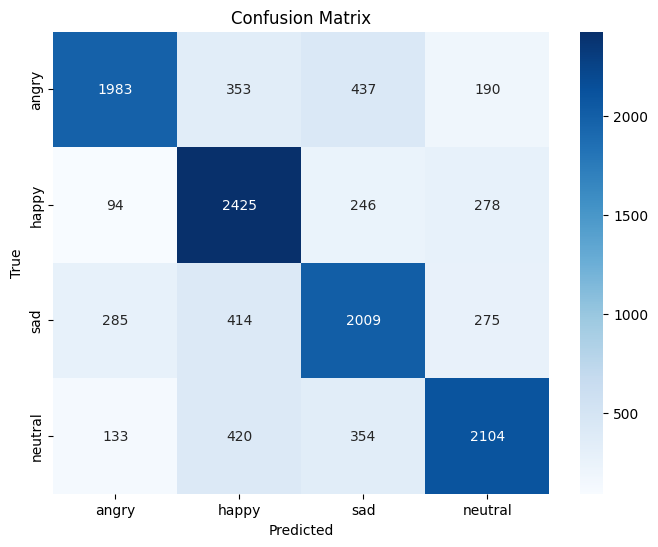

In [ ]:
# plot the confusion matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusionMat, annot = True, fmt = 'd', cmap = "Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
# Print classification report for more detailed metrics
class_report = classification_report(y_test, predictions, target_names=classes)
print(class_report)

              precision    recall  f1-score   support

       angry       0.79      0.67      0.73      2963
       happy       0.67      0.80      0.73      3043
         sad       0.66      0.67      0.67      2983
     neutral       0.74      0.70      0.72      3011

    accuracy                           0.71     12000
   macro avg       0.72      0.71      0.71     12000
weighted avg       0.72      0.71      0.71     12000

